In [1]:
!pip install librosa
!pip install matplotlib
!pip install numpy


In [2]:
import librosa
from librosa import display
import numpy as np
import matplotlib as plt

data, sampling_rate = librosa.load('C:/Users/rihan/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav')

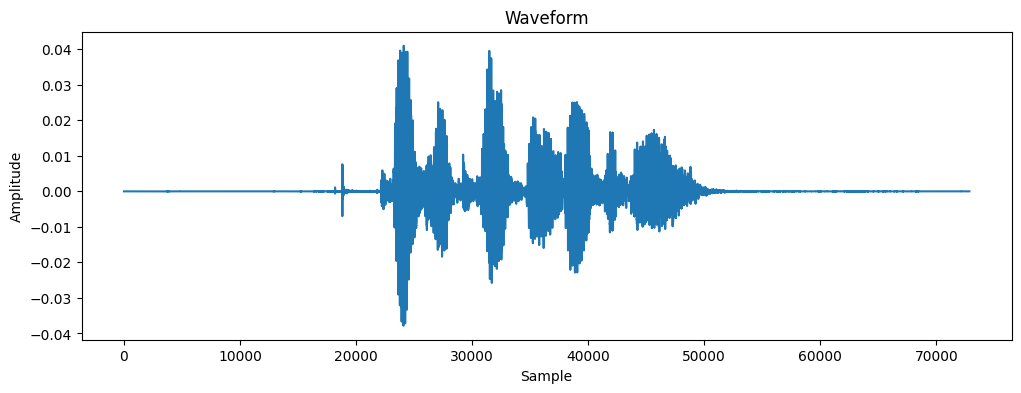

In [3]:
%matplotlib inline
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import librosa

plt.figure(figsize=(12, 4))
plt.plot(data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


In [4]:
import os
import librosa
import numpy as np

true_label=[]
path = 'C:/Users/rihan/RAVDESS'
lst = []

for subdir, dirs, files in os.walk(path):
    for file in files:
        # Check if the file ends with .wav
        if file.endswith(".wav"):
            try:
                # Load audio file using librosa, compute MFCCs
                X, sample_rate = librosa.load(os.path.join(subdir, file), res_type='kaiser_fast')
                mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
                emotion_label = file[6:8] 
                true_label.append(emotion_label)
                arr = mfccs, emotion_label
                lst.append(arr)
                
            except (ValueError, FileNotFoundError, Exception) as e:
                # Handle specific errors during file processing
                print(f"Error processing {file}: {e}")
                continue


In [5]:
X, y = zip(*lst)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
import numpy as np
X_train = np.asarray(X)
y_train = np.asarray(y)

X_train.shape, y_train.shape

((3951, 40), (3951,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [10]:
print(y_train_int)

[8 4 3 ... 4 7 6]


In [11]:
x_traincnn.shape, x_testcnn.shape

((2647, 40, 1), (1304, 40, 1))

In [12]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
tf.__version__

'2.10.0'

In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation,BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, Activation,ELU
# from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)


With *model.summary* we can see a recap of what we have build:

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 40, 128)           768       
                                                                 
 activation_6 (Activation)   (None, 40, 128)           0         
                                                                 
 dropout_4 (Dropout)         (None, 40, 128)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 5, 128)            82048     
                                                                 
 activation_7 (Activation)   (None, 5, 128)            0         
                                                      

Now we can compile and fit our model:

In [43]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



In [46]:
model.fit(x_traincnn, y_train_int, batch_size=8, epochs=500, validation_data=(x_testcnn, y_test_int))

Epoch 1/500
331/331 [==============================] - 2s 7ms/step - loss: 0.3733 - accuracy: 0.8840 - val_loss: 0.5655 - val_accuracy: 0.8152
Epoch 2/500
331/331 [==============================] - 1s 4ms/step - loss: 0.3623 - accuracy: 0.8878 - val_loss: 0.5914 - val_accuracy: 0.8121
Epoch 3/500
331/331 [==============================] - 1s 4ms/step - loss: 0.3391 - accuracy: 0.8961 - val_loss: 0.5666 - val_accuracy: 0.8129
Epoch 4/500
331/331 [==============================] - 1s 4ms/step - loss: 0.3843 - accuracy: 0.8765 - val_loss: 0.5919 - val_accuracy: 0.8044
Epoch 5/500
331/331 [==============================] - 1s 4ms/step - loss: 0.3822 - accuracy: 0.8802 - val_loss: 0.5725 - val_accuracy: 0.8021
Epoch 6/500
331/331 [==============================] - 1s 4ms/step - loss: 0.3787 - accuracy: 0.8780 - val_loss: 0.5703 - val_accuracy: 0.8129
Epoch 7/500
331/331 [==============================] - 1s 4ms/step - loss: 0.3615 - accuracy: 0.8855 - val_loss: 0.5979 - val_accuracy: 0.7998

KeyboardInterrupt: 

Let's plot the loss:

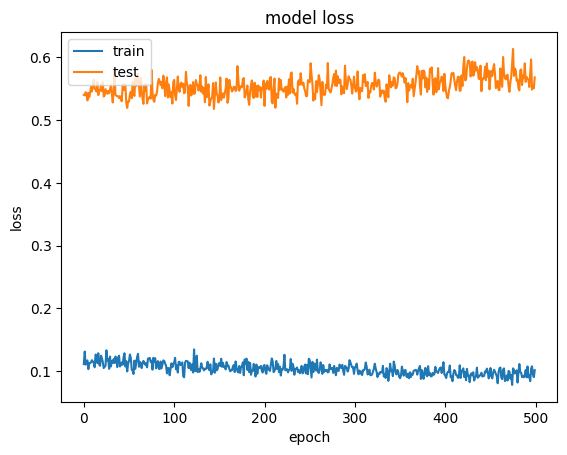

In [34]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



And now let's plot the accuracy:

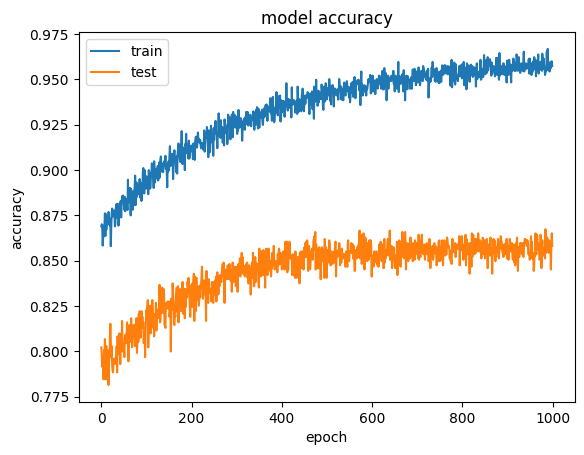

In [26]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save the model

In [27]:
import os 

model_name = 'Emotion_Voice_Detection_Model_95.h5'
save_dir = './'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./Emotion_Voice_Detection_Model_95.h5 


# Reloading the model to test it

In [47]:
loaded_model = keras.models.load_model('E:\\IPD\\Neural_Customized\\Emotion-Classification-Ravdess\\New_Emotion_Voice_Detection_Model.h5')
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 40, 128)           768       
                                                                 
 activation_12 (Activation)  (None, 40, 128)           0         
                                                                 
 dropout_8 (Dropout)         (None, 40, 128)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 10, 128)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 10, 128)           82048     
                                                                 
 activation_13 (Activation)  (None, 10, 128)           0         
                                                      

# Checking the accuracy of the loaded model

In [48]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test_int)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

41/41 [==============================] - 0s 6ms/step - loss: 0.4895 - accuracy: 0.9248
Restored model, accuracy: 92.48%


In [23]:
# import os
# import librosa
# import numpy as np
# from keras.models import load_model

# predicted_label = []
# path = 'C:/Users/rihan/RAVDESS/test'  # Assuming your test data is in this directory
# lst = []

# # Load the trained model
# model = load_model('./Emotion_Voice_Detection_Model_93.h5')  # Replace 'your_model.h5' with the path to your trained model


# for file in X_test:
#     # Check if the file ends with .wav
    
#     try:
#         # Load audio file using librosa, compute MFCCs
        
#         # Predict emotion label using the loaded model
#         predicted_emotion_label = model.predict_classes(file)[0]
#         predicted_label.append(predicted_emotion_label)
        
#         # Assuming emotion labels are in the same format as true labels (e.g., 01 for Emotion1, etc.)
#         # arr = mfccs, str(predicted_emotion_label).zfill(2)
#         # lst.append(arr)
        
#     except (ValueError, FileNotFoundError, Exception) as e:
#         # Handle specific errors during file processing
#         print(f"Error processing {file}: {e}")
#         continue
